In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#Load the dataset
data = pd.read_csv('california_housing.csv')

In [3]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [4]:
#Checking the missing values
missing_values = data.isnull().sum()
print(missing_values)

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
dtype: int64


In [5]:
duplicatedValues = data.duplicated().sum()
print(duplicatedValues)

0


In [6]:
emptyValues = data.empty
print(emptyValues)

False


In [7]:
#Standardize numerical features
scaler = StandardScaler()
numerical_features = data.drop(columns=['median_house_value'])
scaled_features = scaler.fit_transform(numerical_features) 
scaled_data = pd.DataFrame(scaled_features, columns = numerical_features.columns)
scaled_data['median_house_value'] = data['median_house_value'].values

In [8]:
#Split the dataset into training and test data sets
X = scaled_data.drop(columns='median_house_value')
y = scaled_data['median_house_value']

In [9]:
# Split the datasets into train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13600, 8), (3400, 8), (13600,), (3400,))

2. Exploratory Data Analysis (EDA)

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

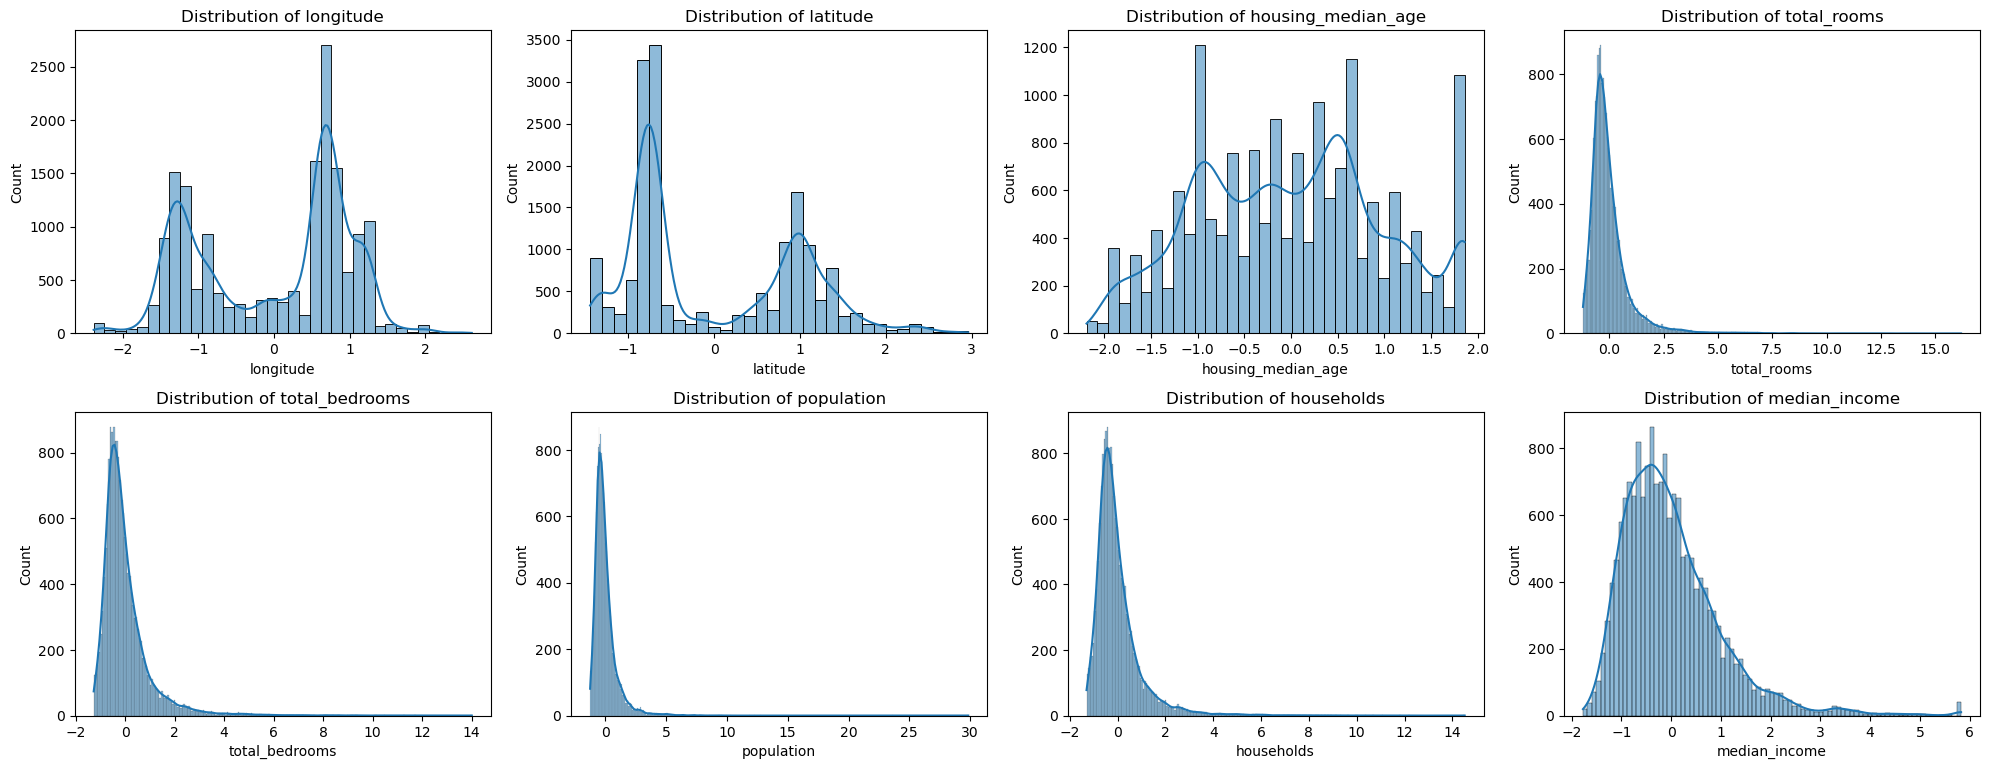

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Analyse the distribution of each features
plt.figure(figsize=(20, 15))
for i, col in enumerate(X.columns, 1):
    plt.subplot(4,4,i)
    sns.histplot(X[col], kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


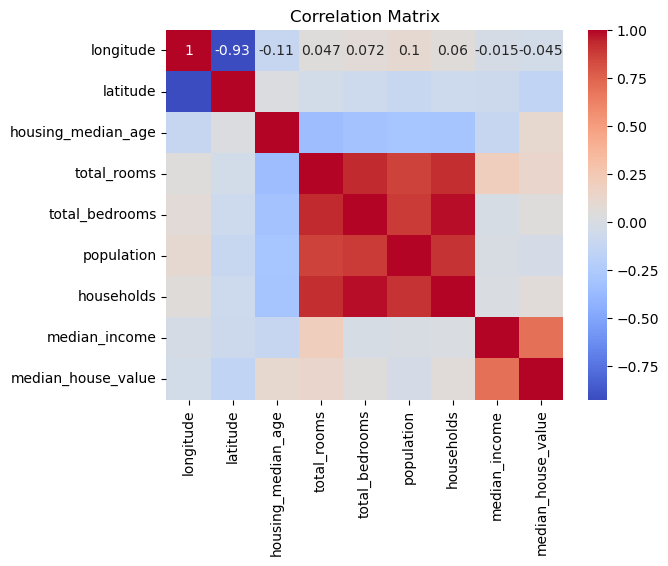

In [11]:
# Analyse the correlation between features and the target variables
correlation_matrix = scaled_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

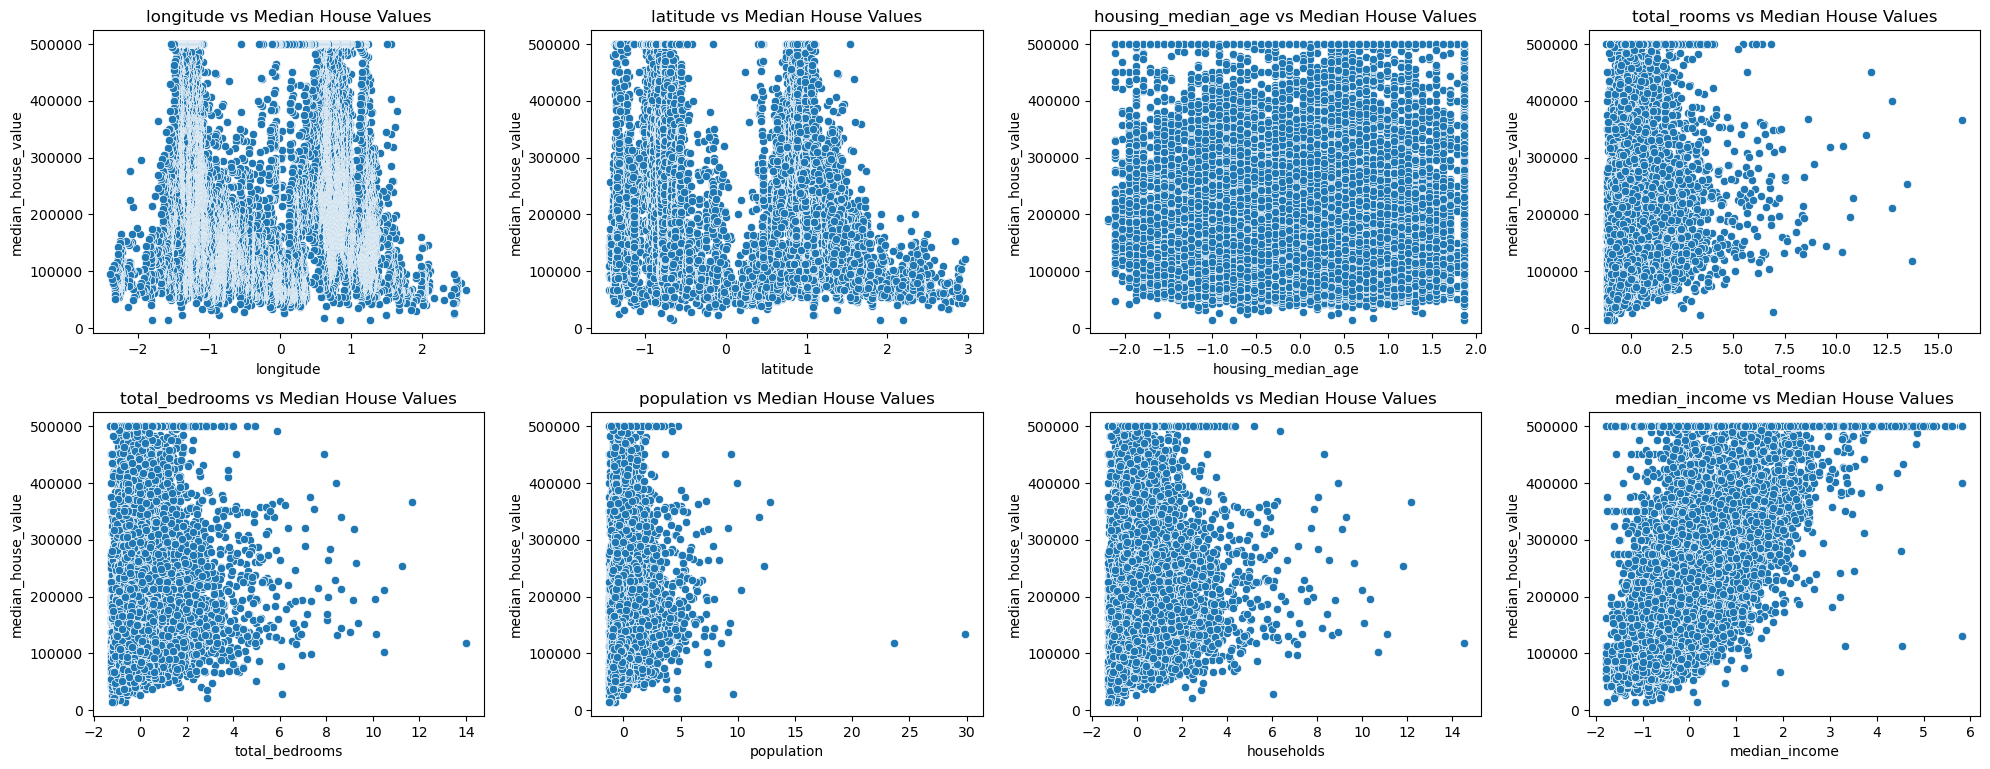

In [12]:
#Visualize the relationships using scatterplots
plt.figure(figsize=(20,15))
for i, col in enumerate(X.columns, 1):
    plt.subplot(4 ,4 , i)
    sns.scatterplot(x=scaled_data[col], y=scaled_data['median_house_value'])
    plt.title(f'{col} vs Median House Values')
plt.tight_layout()
plt.show()

Machine Learning Model Development

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [14]:
lr = LinearRegression()
rf = RandomForestRegressor(random_state=42)
gb = GradientBoostingRegressor(random_state=42)

In [15]:
# Train the model
models = {'Linear Regression': lr, 'Random Forest': rf, 'Gradient Boosting': gb}
results= {}

In [16]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE':mse, 'MAE':mae, 'R^2':r2}

results
    

{'Linear Regression': {'MSE': 4634658406.223357,
  'MAE': 49983.47465122922,
  'R^2': 0.6636396350243802},
 'Random Forest': {'MSE': 2445964506.2273626,
  'MAE': 32399.400661764706,
  'R^2': 0.8224841095241663},
 'Gradient Boosting': {'MSE': 2963339522.3601747,
  'MAE': 37586.528167677316,
  'R^2': 0.7849356142516728}}

Model Deployment and Recommendation

In [17]:
import pickle

# Select the best performing model
best_model = gb

# Save the trained model to a file
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)
    
#Load the saved model
with open ('best_model.pkl', 'rb') as file:
    loaded_model = pickle.load(file)
    
# Make predictions using loaded model
y_pred = loaded_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Model Performance:")
print("MSE:", mse)
print("MAE:", mae)
print("R^2 Score:", r2)

Model Performance:
MSE: 2963339522.3601747
MAE: 37586.528167677316
R^2 Score: 0.7849356142516728


In [19]:
# Example usage of the deployed model
new_data = pd.DataFrame({
    'latitude': [37.7749],
    'longitude': [-122.4194],
    'housing_median_age': [30],
    'total_rooms': [2000],
    'total_bedrooms': [400],
    'population': [1000],
    'households': [400],
    'median_income':[5.0]
})

# Set the features names of new_data to match the features name used during training
new_data.columns = X.columns

# Scale the new data using the same scaler used during training
new_data_scaled = scaler.transform(new_data)

# Make predictions on new data
new_predictions = loaded_model.predict(new_data_scaled)
print('Predictions for new data:', new_predictions)

Predictions for new data: [154813.07354931]


D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(


In [20]:
import pickle
#Save the model to a file
with open ('gradient_boosting_model.pkl', 'wb') as f:
    pickle.dump(gb, f)

In [ ]:
from flask import Flask, request
import numpy as np

app = Flask(__name__)

# Load the model from the file
with open('gradient_boosting_model.pkl', 'rb') as f:
    model = pickle.load(f)

@app.route('/predict', methods=['POST'])
def predict():
    # Get the input data from the request
    data = request.get_json()
    input_data = np.array(data['input']).reshape(1, -1)

    # Make a prediction using the model
    prediction = model.predict(input_data)

    # Return the prediction as a JSON response
    return {'prediction': prediction.tolist()}

if __name__ == '__main__':
    app.run(port=5003)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5003
Press CTRL+C to quit
D:\Anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingRegressor was fitted with feature names
  warnings.warn(
127.0.0.1 - - [24/Jun/2024 09:06:40] "POST /predict HTTP/1.1" 200 -
